In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
                    names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
                             'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 
                             'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 
                             'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 
                             'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])
car_df.shape

(205, 26)

In [4]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [5]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [6]:
# dropping the columns due to low variance filter. i.e an attribute which is mostly one type of data is not a good dimension.
car_df = car_df.drop(['fuel_type', 'engine_location', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_type', 'fuel_system', 
                     'aspiration', 'normalized_losses', 'make'], axis = 1)

In [7]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [22]:
car_df.num_of_cylinders.value_counts()
car_df['cylinders_count'] = car_df.num_of_cylinders.replace({'one': 1, 'two': 2, 'three' : 3, 'four' : 4, 
                                                             'five' : 5, 'six': 6, 'seven' : 7, 'eight' : 8,
                                                             'nine' : 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [23]:
car_df = car_df.replace('?', np.nan) # replace ? with NA which is equivalent of null
car_df[car_df.isnull().any(axis = 1)] # display records with NA

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinders_count
9,0,99.5,178.2,67.9,52.0,3053,five,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,5
44,1,94.5,155.9,63.6,52.0,1874,four,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN,4
45,0,94.5,155.9,63.6,52.0,1909,four,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN,4
55,3,95.3,169.0,65.7,49.6,2380,two,70,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0,2
56,3,95.3,169.0,65.7,49.6,2380,two,70,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0,2
57,3,95.3,169.0,65.7,49.6,2385,two,70,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0,2
58,3,95.3,169.0,65.7,49.6,2500,two,80,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0,2
129,1,98.4,175.7,72.3,50.5,3366,eight,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN,8
130,0,96.1,181.5,66.5,55.2,2579,four,132,3.46,3.90,8.7,NaN,NaN,23,31,9295.0,4
131,2,96.1,176.8,66.6,50.5,2460,four,132,3.46,3.90,8.7,NaN,NaN,23,31,9895.0,4


In [27]:
car_df = car_df.astype({
    'bore' : 'float64',
    'stroke' : 'float64',
    'horsepower' : 'float64',
    'peak_rpm' : 'float64',
    'price' : 'float64',
    'cylinders_count' : 'float64'
    })
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinders_count      float64
dtype: object

In [28]:
# Fillup NaN in numeric columns with their median values.
car_df.price = car_df.price.fillna(car_df.price.median())
car_df.bore = car_df.bore.fillna(car_df.bore.median())
car_df.horsepower = car_df.horsepower.fillna(car_df.horsepower.median())
car_df.peak_rpm = car_df.peak_rpm.fillna(car_df.peak_rpm.median())
car_df.stroke =car_df.stroke.fillna(car_df.stroke.median())
car_df.cylinders_count = car_df.cylinders_count.fillna(car_df.cylinders_count.median())

In [30]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


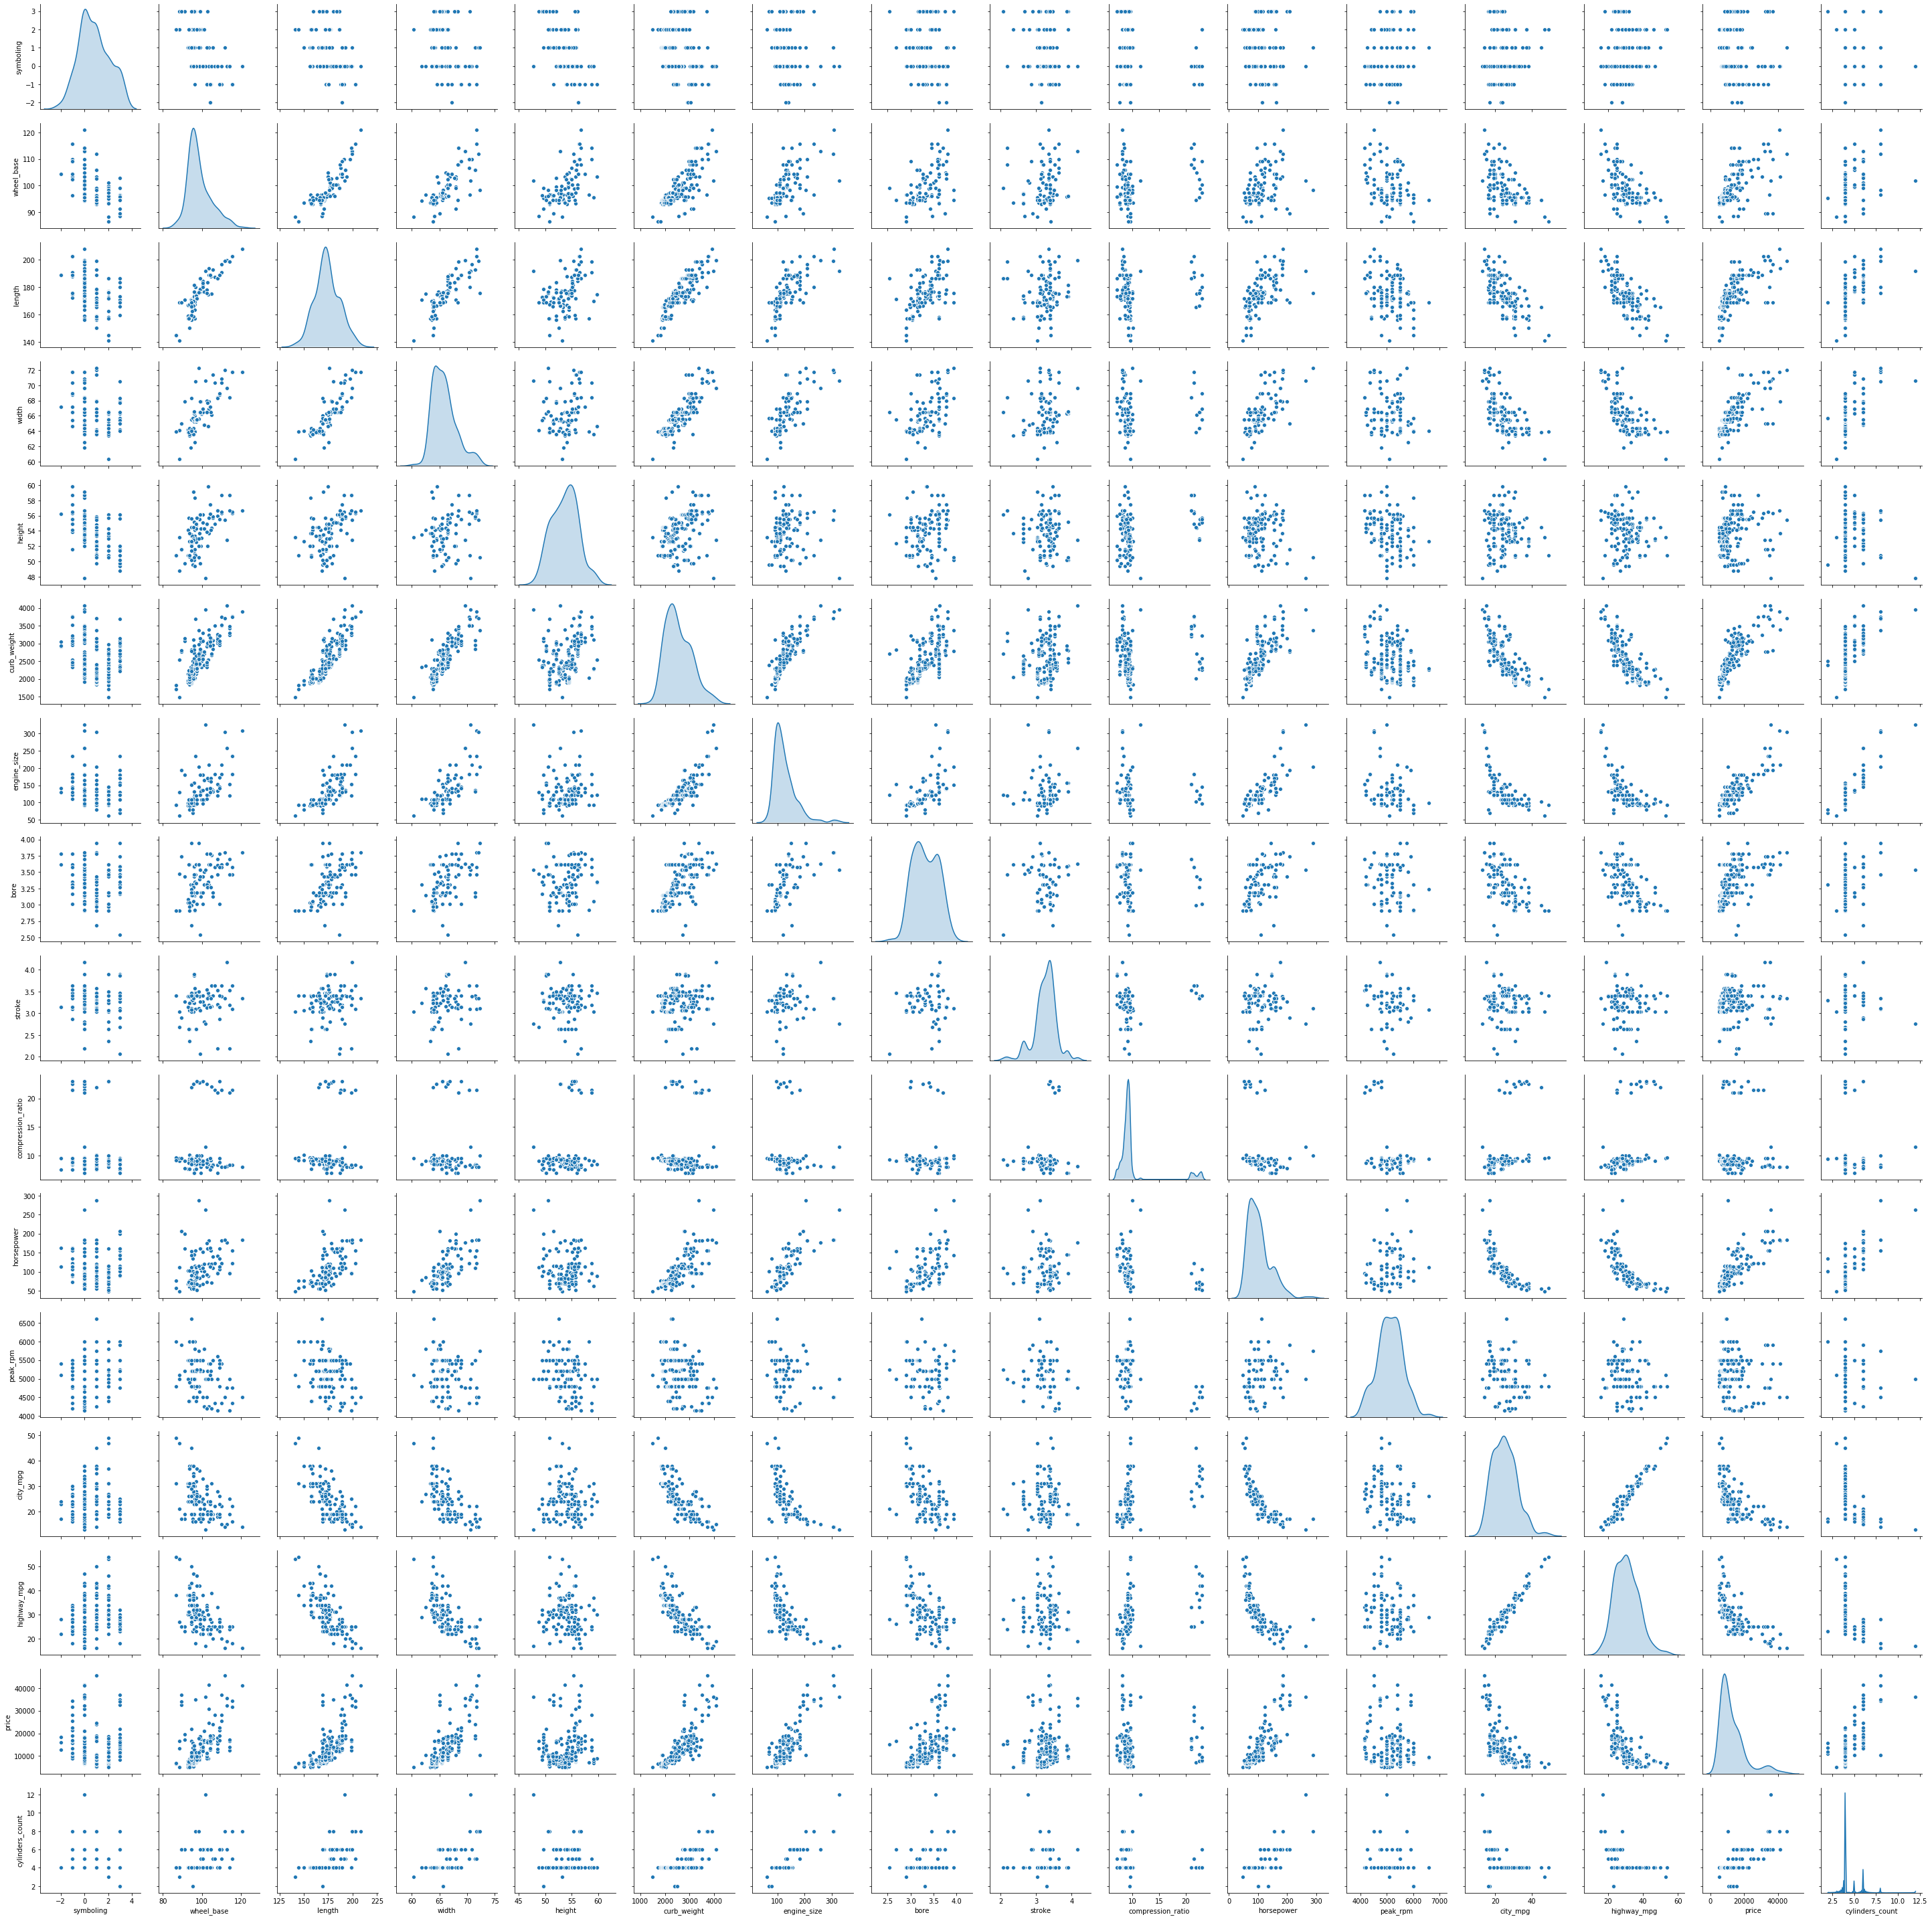

In [38]:
# After this go for pair plots. And make the diagonals as density plots.
import seaborn as sns
# car_df_attr = car_df.iloc[:, 1:16]
sns.pairplot(car_df, diag_kind = 'kde')

In [41]:
# Copy all the predictor variable to data frame X. Since Price is dependent variable, drop it.
X = car_df.drop('price', axis = 1)
X = X.drop('num_of_cylinders', axis = 1)

In [42]:
y = car_df.price

In [46]:
# Split and test and train data
from sklearn.model_selection import train_test_split

# split x and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((153, 15), (153,), (52, 15), (52,))

In [47]:
# invoke the LinearRegression function and find the best fit model on the training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# let us explore the coefficients for each of the independent variable

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for symboling is 88.57794900973566
The coefficient for wheel_base is 71.82402760934986
The coefficient for length is -93.3844787201191
The coefficient for width is 479.81643559267866
The coefficient for height is 315.2038400121214
The coefficient for curb_weight is -0.8657326891351419
The coefficient for engine_size is 251.74362582792023
The coefficient for bore is -6832.550987635414
The coefficient for stroke is -5085.81885979059
The coefficient for compression_ratio is 335.7682519296386
The coefficient for horsepower is -0.03898796131217402
The coefficient for peak_rpm is 2.4300494935823127
The coefficient for city_mpg is -201.81713200347048
The coefficient for highway_mpg is -41.934319357320746
The coefficient for cylinders_count is -3176.176090372959


In [55]:
regression_model.intercept_

-12323.060174569477

In [57]:
regression_model.score(X_test, y_test)

0.8362176483290366

**How can the model performance be improved ?**

1. Always address outliers first. Linear Models get easily impacted by outliers.
2. We notices that on many attributes, there was a clump of data points on lower values and scattered on high values.
3. That is an indication of mixing data from two or more different segments. May be if we segregate the data we will get better results.
4. Not all attributes show a linear relation to price. Convert these attributes to quadratic form which may give us a better fit on linear model.


In [58]:
import statsmodels.formula.api as smf

# put the price column and the predictors together in on single array for OLS to work
cars = pd.concat([y_train, X_train], axis = 1)
cars.head()

,price,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinders_count
14,24565.0,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6.0
162,9258.0,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4.0
59,8845.0,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4.0
19,6295.0,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4.0
177,11248.0,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4.0


In [61]:
ols = smf.ols(formula='price~symboling+wheel_base+length+width+height+curb_weight+engine_size+bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg+cylinders_count', data = cars)

In [62]:
model = ols.fit()

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     41.83
Date:                Sat, 08 Feb 2020   Prob (F-statistic):           1.31e-43
Time:                        23:56:48   Log-Likelihood:                -1455.7
No. Observations:                 153   AIC:                             2943.
Df Residuals:                     137   BIC:                             2992.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.232e+04   1.92e+0

In [1]:
74.910 * -1.247

-93.41277000000001